Посчитаем вариант:

In [164]:
ord('K')%5

0

Импортируем библиотеки:

In [165]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as me
import sklearn.datasets as ds
import sklearn.cluster as cl
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw
fw('ignore')

Сгенерируем "пятна":

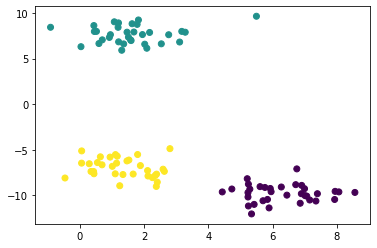

In [166]:
x,y = ds.make_blobs()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans:

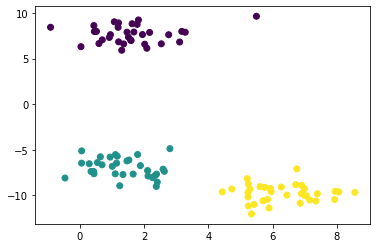

In [167]:
ypred = cl.KMeans(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering:

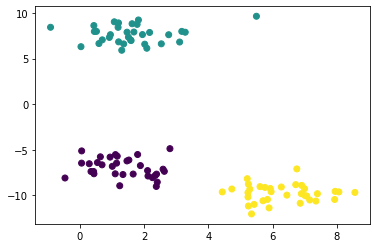

In [168]:
ypred = cl.AgglomerativeClustering(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN:

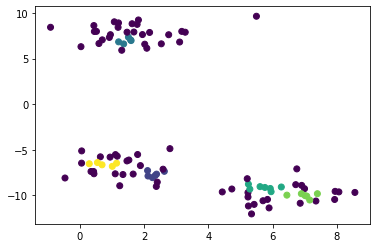

In [169]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Сгенерируем полумесяцы:

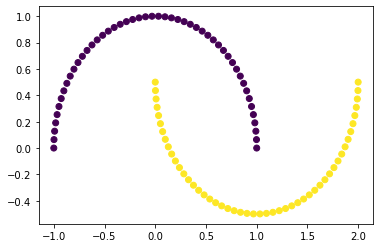

In [170]:
x,y = data = ds.make_moons()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans:

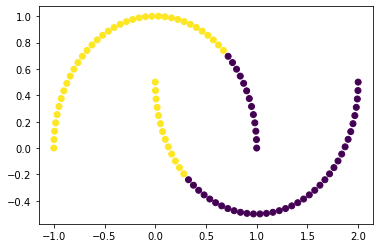

In [171]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering:

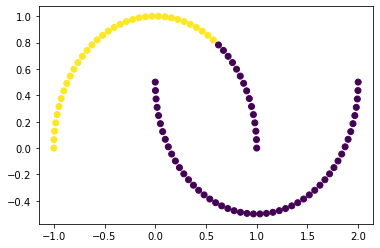

In [172]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN:

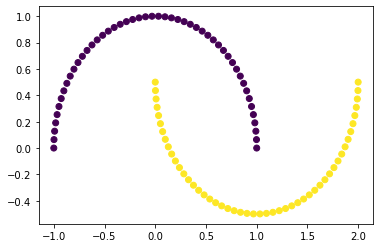

In [173]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Сгенерируем окружности:

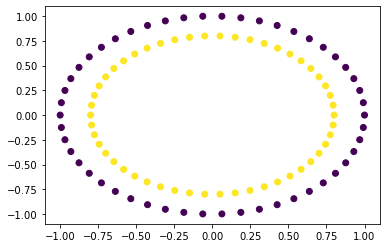

In [174]:
x,y = data = ds.make_circles()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans:

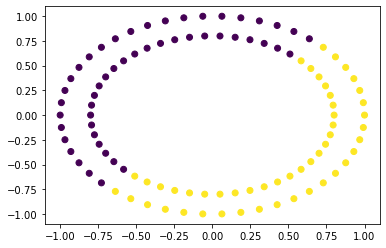

In [175]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering:

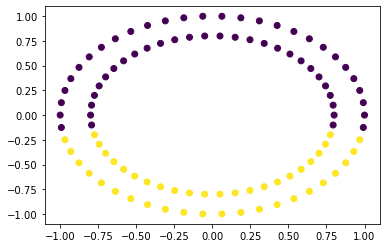

In [176]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN:

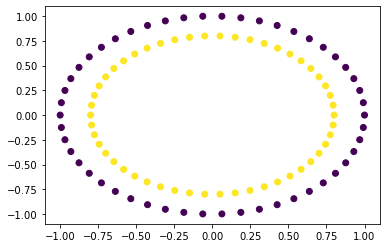

In [177]:
ypred = cl.DBSCAN(eps=0.15,min_samples=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Прочитаем датасет, разделим на входные и целевой параметры:

In [178]:
data = pd.read_csv('seeds.csv', sep=' ')
data.head()
# отделим целевой параметр
x = data.iloc[:,:-1]
y = data.iloc[:,-1:].to_numpy().flatten()

Построим scatter:

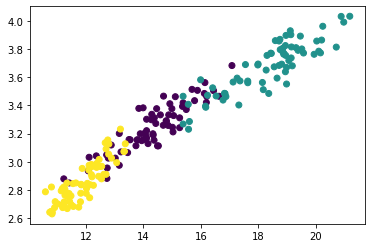

In [179]:
plt.scatter(x['area'], x['kernelwidth'], c=y)

Посмотрим, на какое количество кластеров лучше разделить:

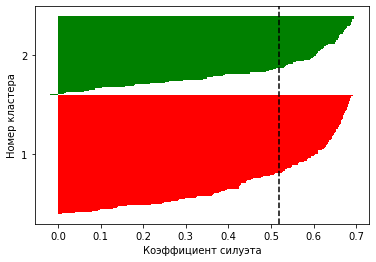

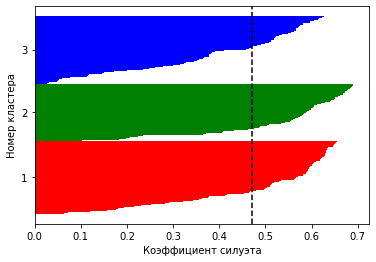

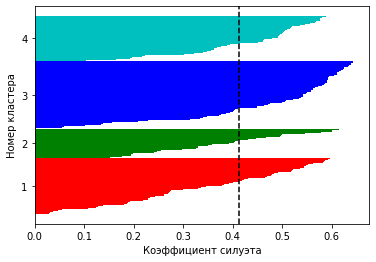

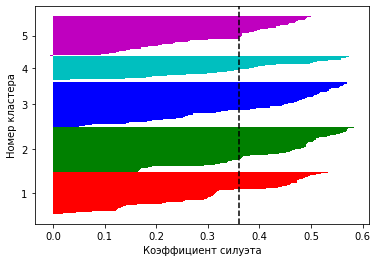

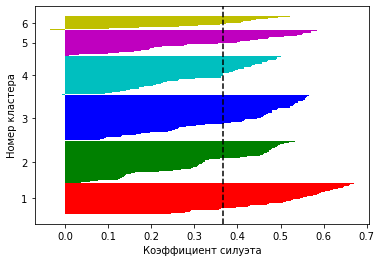

In [180]:
for i in range(2,7):
    ypred = cl.KMeans(n_clusters=i).fit_predict(x)

    cl_labels = np.unique(ypred)
    n_clusters  = cl_labels.shape[0]
    sil_vals = me.silhouette_samples(x,ypred)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for c in cl_labels:
        c_silvals = sil_vals[ypred == c]
        c_silvals.sort()
        y_ax_upper += len(c_silvals)
        color = ['r','g','b','c','m','y'][c]  
        plt.barh(range(y_ax_lower, y_ax_upper), 
                c_silvals, 
                height = 1.0, 
                edgecolor='none', color = color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silvals)

    sil_avg = np.mean(sil_vals)
    plt.axvline(sil_avg, color = 'k', linestyle = '--')
    plt.yticks(yticks, cl_labels + 1)
    plt.ylabel('Номер кластера')
    plt.xlabel('Коэффициент силуэта')
    plt.show()

В целом, можно использовать любое количество из проверенных, но возьмем по количеству классов в датасете:

KMeans без параметров:

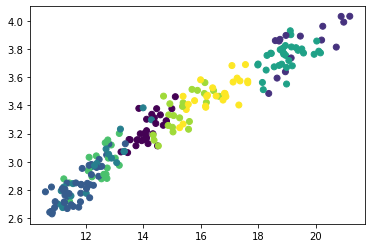

In [181]:
cluster = cl.KMeans()
ypred = cluster.fit_predict(x)
plt.scatter(x['area'], x['kernelwidth'], c=ypred)

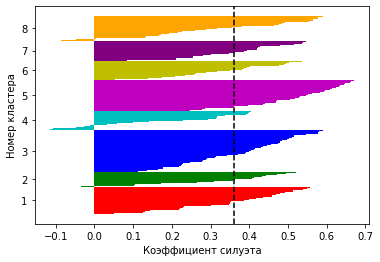

In [182]:
cl_labels = np.unique(ypred)
n_clusters  = cl_labels.shape[0]
sil_vals = me.silhouette_samples(x,ypred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for c in cl_labels:
    c_silvals = sil_vals[ypred == c]
    c_silvals.sort()
    y_ax_upper += len(c_silvals)
    color = ['r','g','b','c','m','y','purple','orange'][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silvals, 
            height = 1.0, 
            edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silvals)

sil_avg = np.mean(sil_vals)
plt.axvline(sil_avg, color = 'k', linestyle = '--')
plt.yticks(yticks, cl_labels + 1)
plt.ylabel('Номер кластера')
plt.xlabel('Коэффициент силуэта')
plt.show()

KMeans - 3 кластера:

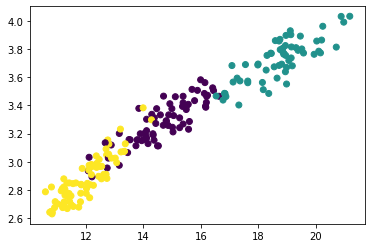

In [183]:
cluster = cl.KMeans(n_clusters=3)
ypred = cluster.fit_predict(x)
plt.scatter(x['area'], x['kernelwidth'], c=ypred)

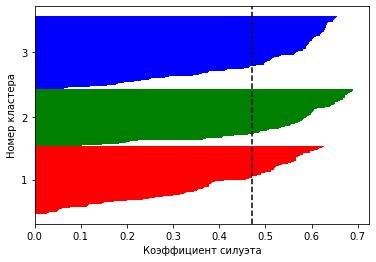

In [184]:
cl_labels = np.unique(ypred)
n_clusters  = cl_labels.shape[0]
sil_vals = me.silhouette_samples(x,ypred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for c in cl_labels:
    c_silvals = sil_vals[ypred == c]
    c_silvals.sort()
    y_ax_upper += len(c_silvals)
    color = ['r','g','b','c','m','y'][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silvals, 
            height = 1.0, 
            edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silvals)

sil_avg = np.mean(sil_vals)
plt.axvline(sil_avg, color = 'k', linestyle = '--')
plt.yticks(yticks, cl_labels + 1)
plt.ylabel('Номер кластера')
plt.xlabel('Коэффициент силуэта')
plt.show()

Agglomerative без параметров:

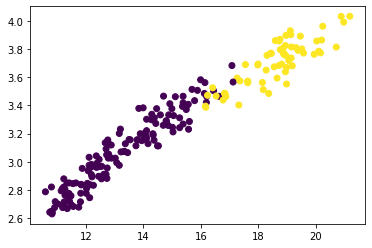

In [185]:
cluster = cl.AgglomerativeClustering()
ypred = cluster.fit_predict(x)
plt.scatter(x['area'], x['kernelwidth'], c=ypred)

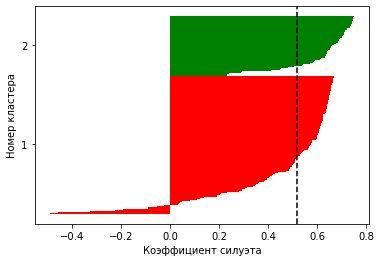

In [186]:
cl_labels = np.unique(ypred)
n_clusters  = cl_labels.shape[0]
sil_vals = me.silhouette_samples(x,ypred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for c in cl_labels:
    c_silvals = sil_vals[ypred == c]
    c_silvals.sort()
    y_ax_upper += len(c_silvals)
    color = ['r','g','b','c','m','y'][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silvals, 
            height = 1.0, 
            edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silvals)

sil_avg = np.mean(sil_vals)
plt.axvline(sil_avg, color = 'k', linestyle = '--')
plt.yticks(yticks, cl_labels + 1)
plt.ylabel('Номер кластера')
plt.xlabel('Коэффициент силуэта')
plt.show()

Agglomerative - 3 кластера:

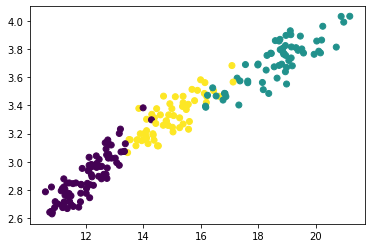

In [187]:
cluster = cl.AgglomerativeClustering(n_clusters=3)
ypred = cluster.fit_predict(x)
plt.scatter(x['area'], x['kernelwidth'], c=ypred)

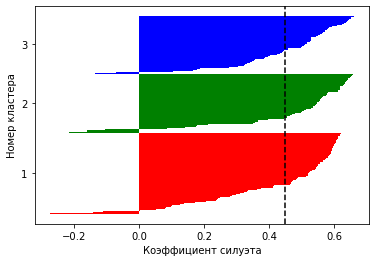

In [188]:
cl_labels = np.unique(ypred)
n_clusters  = cl_labels.shape[0]
sil_vals = me.silhouette_samples(x,ypred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for c in cl_labels:
    c_silvals = sil_vals[ypred == c]
    c_silvals.sort()
    y_ax_upper += len(c_silvals)
    color = ['r','g','b','c','m','y'][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silvals, 
            height = 1.0, 
            edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silvals)

sil_avg = np.mean(sil_vals)
plt.axvline(sil_avg, color = 'k', linestyle = '--')
plt.yticks(yticks, cl_labels + 1)
plt.ylabel('Номер кластера')
plt.xlabel('Коэффициент силуэта')
plt.show()

DBSCAN без параметров:

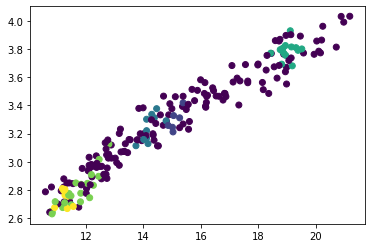

In [189]:
cluster = cl.DBSCAN()
ypred = cluster.fit_predict(x)
plt.scatter(x['area'], x['kernelwidth'], c=ypred)

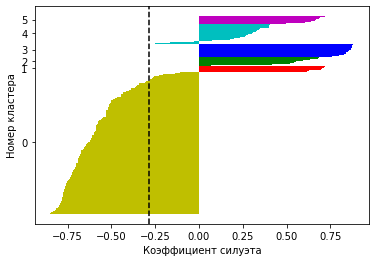

In [190]:
cl_labels = np.unique(ypred)
n_clusters  = cl_labels.shape[0]
sil_vals = me.silhouette_samples(x,ypred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for c in cl_labels:
    c_silvals = sil_vals[ypred == c]
    c_silvals.sort()
    y_ax_upper += len(c_silvals)
    color = ['r','g','b','c','m','y'][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silvals, 
            height = 1.0, 
            edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silvals)

sil_avg = np.mean(sil_vals)
plt.axvline(sil_avg, color = 'k', linestyle = '--')
plt.yticks(yticks, cl_labels + 1)
plt.ylabel('Номер кластера')
plt.xlabel('Коэффициент силуэта')
plt.show()

DBSCAN c epsilon=0.93 и min_samples=13:

rand score is 0.7604921394395079
clusters are {-1: 70, 0: 46, 1: 60, 2: 34}


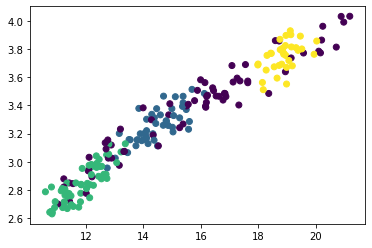

In [191]:
cluster = cl.DBSCAN(eps=0.93,min_samples=13)
ypred = cluster.fit_predict(x)
plt.scatter(x['area'], x['kernelwidth'], c=ypred)
print('rand score is {0}'.format(me.cluster.rand_score(y,ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters are {0}'.format(dict(zip(tempu,tempc))))

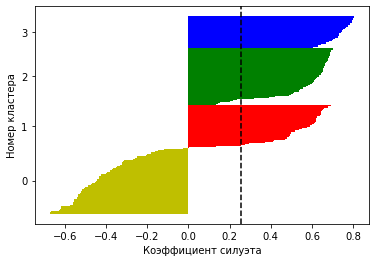

In [192]:
cl_labels = np.unique(ypred)
n_clusters  = cl_labels.shape[0]
sil_vals = me.silhouette_samples(x,ypred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for c in cl_labels:
    c_silvals = sil_vals[ypred == c]
    c_silvals.sort()
    y_ax_upper += len(c_silvals)
    color = ['r','g','b','c','m','y'][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silvals, 
            height = 1.0, 
            edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silvals)

sil_avg = np.mean(sil_vals)
plt.axvline(sil_avg, color = 'k', linestyle = '--')
plt.yticks(yticks, cl_labels + 1)
plt.ylabel('Номер кластера')
plt.xlabel('Коэффициент силуэта')
plt.show()